In [1]:
import numpy as np
import pandas as pd
d = pd.read_csv("se.csv")
d

,Polarity,Sentence
0,0,పరువునష్టాన్ని కలిగించే చర్యలను 1860 నాటి భారత...
1,1,వాహనంలో ఉన్న పోలీసు సిబ్బందికి బుల్లెట్ ప్రూఫ్...
2,-1,"దేశంపట్ల కానీ, ప్రజలపట్ల కానీ బాధ్యత కనిపించదు."
3,0,ఒక పనిమనిషి కుమారుడు ఈ దేశ ప్రధాని కావడం అంబేద...
4,0,మత ప్రాతిపదికన మనుషుల్ని రెచ్చగొట్టే ఉగ్రవాదం ...
...,...,...
5405,1,క్రీడాస్ఫూర్తి వీటన్నింటినీ మించి ఉన్నప్పుడు మ...
5406,0,"ఆయన అందించిన చైతన్యంతో ఎదిగివచ్చి, సంఘటితమవుతు..."
5407,1,భారతతో వాణిజ్యాన్ని వజ్రాలకు మాత్రమే పరిమితం చ...
5408,0,అంతర్జాతీయ టోర్నీల్లో పోర్చుగల్ విజేతగా నిలవడం...


In [2]:
d.head(5)

,Polarity,Sentence
0,0,పరువునష్టాన్ని కలిగించే చర్యలను 1860 నాటి భారత...
1,1,వాహనంలో ఉన్న పోలీసు సిబ్బందికి బుల్లెట్ ప్రూఫ్...
2,-1,"దేశంపట్ల కానీ, ప్రజలపట్ల కానీ బాధ్యత కనిపించదు."
3,0,ఒక పనిమనిషి కుమారుడు ఈ దేశ ప్రధాని కావడం అంబేద...
4,0,మత ప్రాతిపదికన మనుషుల్ని రెచ్చగొట్టే ఉగ్రవాదం ...


In [3]:
d.tail(5)

,Polarity,Sentence
5405,1,క్రీడాస్ఫూర్తి వీటన్నింటినీ మించి ఉన్నప్పుడు మ...
5406,0,"ఆయన అందించిన చైతన్యంతో ఎదిగివచ్చి, సంఘటితమవుతు..."
5407,1,భారతతో వాణిజ్యాన్ని వజ్రాలకు మాత్రమే పరిమితం చ...
5408,0,అంతర్జాతీయ టోర్నీల్లో పోర్చుగల్ విజేతగా నిలవడం...
5409,0,"కానీ, నాయకులకు ఈ అంశం సుదీర్ఘకాలం నానడం అవసరం."


In [4]:
d['Polarity'].value_counts()

 0    2478
 1    1491
-1    1441
Name: Polarity, dtype: int64

<AxesSubplot:>

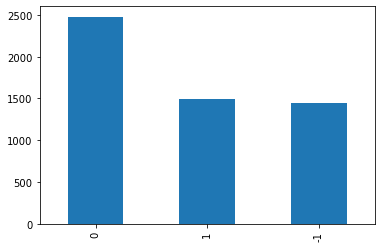

In [5]:
d['Polarity'].value_counts().plot(kind = 'bar')

# Removing Special Characters from Data

In [6]:
sentences = d['Sentence']
filt_sent = []
for sentence in sentences:
    remove_sep = sentence.replace(',','').replace('?','').replace('.','').replace("'","")
    filt_sent.append(remove_sep)


In [7]:
d['Filter Sentence'] = filt_sent

In [8]:
d.head(5)

,Polarity,Sentence,Filter Sentence
0,0,పరువునష్టాన్ని కలిగించే చర్యలను 1860 నాటి భారత...,పరువునష్టాన్ని కలిగించే చర్యలను 1860 నాటి భారత...
1,1,వాహనంలో ఉన్న పోలీసు సిబ్బందికి బుల్లెట్ ప్రూఫ్...,వాహనంలో ఉన్న పోలీసు సిబ్బందికి బుల్లెట్ ప్రూఫ్...
2,-1,"దేశంపట్ల కానీ, ప్రజలపట్ల కానీ బాధ్యత కనిపించదు.",దేశంపట్ల కానీ ప్రజలపట్ల కానీ బాధ్యత కనిపించదు
3,0,ఒక పనిమనిషి కుమారుడు ఈ దేశ ప్రధాని కావడం అంబేద...,ఒక పనిమనిషి కుమారుడు ఈ దేశ ప్రధాని కావడం అంబేద...
4,0,మత ప్రాతిపదికన మనుషుల్ని రెచ్చగొట్టే ఉగ్రవాదం ...,మత ప్రాతిపదికన మనుషుల్ని రెచ్చగొట్టే ఉగ్రవాదం ...


# One Hot Encoding

In [9]:
from sklearn import preprocessing
    
encoder = preprocessing.OneHotEncoder(sparse = False)
enc_df = pd.DataFrame(encoder.fit_transform(d[['Polarity']]))
enc_df.columns = encoder.get_feature_names_out(['Polarity'])
d = d.join(enc_df)
d                                               

,Polarity,Sentence,Filter Sentence,Polarity_-1,Polarity_0,Polarity_1
0,0,పరువునష్టాన్ని కలిగించే చర్యలను 1860 నాటి భారత...,పరువునష్టాన్ని కలిగించే చర్యలను 1860 నాటి భారత...,0.0,1.0,0.0
1,1,వాహనంలో ఉన్న పోలీసు సిబ్బందికి బుల్లెట్ ప్రూఫ్...,వాహనంలో ఉన్న పోలీసు సిబ్బందికి బుల్లెట్ ప్రూఫ్...,0.0,0.0,1.0
2,-1,"దేశంపట్ల కానీ, ప్రజలపట్ల కానీ బాధ్యత కనిపించదు.",దేశంపట్ల కానీ ప్రజలపట్ల కానీ బాధ్యత కనిపించదు,1.0,0.0,0.0
3,0,ఒక పనిమనిషి కుమారుడు ఈ దేశ ప్రధాని కావడం అంబేద...,ఒక పనిమనిషి కుమారుడు ఈ దేశ ప్రధాని కావడం అంబేద...,0.0,1.0,0.0
4,0,మత ప్రాతిపదికన మనుషుల్ని రెచ్చగొట్టే ఉగ్రవాదం ...,మత ప్రాతిపదికన మనుషుల్ని రెచ్చగొట్టే ఉగ్రవాదం ...,0.0,1.0,0.0
...,...,...,...,...,...,...
5405,1,క్రీడాస్ఫూర్తి వీటన్నింటినీ మించి ఉన్నప్పుడు మ...,క్రీడాస్ఫూర్తి వీటన్నింటినీ మించి ఉన్నప్పుడు మ...,0.0,0.0,1.0
5406,0,"ఆయన అందించిన చైతన్యంతో ఎదిగివచ్చి, సంఘటితమవుతు...",ఆయన అందించిన చైతన్యంతో ఎదిగివచ్చి సంఘటితమవుతున...,0.0,1.0,0.0
5407,1,భారతతో వాణిజ్యాన్ని వజ్రాలకు మాత్రమే పరిమితం చ...,భారతతో వాణిజ్యాన్ని వజ్రాలకు మాత్రమే పరిమితం చ...,0.0,0.0,1.0
5408,0,అంతర్జాతీయ టోర్నీల్లో పోర్చుగల్ విజేతగా నిలవడం...,అంతర్జాతీయ టోర్నీల్లో పోర్చుగల్ విజేతగా నిలవడం...,0.0,1.0,0.0


# Splitting the data into Train and Test


In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(d['Filter Sentence'],d['Polarity'],test_size=0.2,random_state = 42,shuffle=True)

In [33]:
print(y_train.shape)
print(y_test.shape)

(4328,)
(1082,)


# Feature extraction

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(d['Filter Sentence'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(x_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(x_test)

# Training model

In [19]:
from sklearn.pipeline import Pipeline
from sklearn import tree
dt = tree.DecisionTreeClassifier()

tfidf = TfidfVectorizer(strip_accents = None,preprocessor = None)
dt_tfidf = Pipeline([('vect',tfidf),('classifier',dt)])
dt_tfidf.fit(x_train,y_train)


Pipeline(steps=[('vect', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

In [20]:
Pipeline(steps=[('vect',TfidfVectorizer()),('classifier',dt)])

Pipeline(steps=[('vect', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

# Testing Model

In [21]:
y_pred = dt_tfidf.predict(x_test)
input_list = x_test.tolist()
for i in range(10):
    print('Test sentence'+str(i)+"..."+input_list[i]+"....",y_pred[i])

Test sentence0...‘బేటీ బచావ్ బేటీ పఢావ్’ నినాదం సమాజం ఆలోచనాతీరును మార్చివేసిందంటూ అందుకు ఉదాహరణగా రిపబ్లిక్ దినోత్సవ వేడుకల్లో ఆడపిల్లలకు ప్రాముఖ్యతనిచ్చాయంటూ ఆయన ఉదహరించిన రెండు రాష్ట్రాలూ ఆయన పార్టీ అధికారంలో ఉన్నవే లింగనిష్పత్తి విషయంలో వెనుకబడివున్నవే.... -1
Test sentence1...వనబంధు కల్యాణ యోజన అమలుకు రెండు నెలలుగా సర్వేలు చేసిన అధికారులు మూడు మండలాల్లో అమలుకు చర్యలు చేపడుతున్నారు.... -1
Test sentence2...నిరుపేద కుటుంబానికి చెందిన మత్స సంతోషి వెయిట్ లిఫ్టింగ్లో రజతం సాధించింది.... -1
Test sentence3...సమాజ క్షేమం కోసం ఒక సమాచారాన్ని వెల్లడిచేయడం పరువునష్టం కిందికి రాదు అయితే అది సమాజక్షేమం కోసమని రుజువు చేయవలసి ఉంటుంది .... 0
Test sentence4...ఇదే అంశాన్ని సైతం సుప్రీం కోర్టు లోధా కమిటీ విచారణ సందర్భంగా ప్రస్తావించింది.... 0
Test sentence5...అందువల్ల మంత్రిత్వ శాఖ నుంచి ఏ సూచన వచ్చినా ప్రతికూల వాదనలనే వస్తాయి.... 0
Test sentence6...పర్యావరణ పరిహారం మాత్రమే’ అని సర్దిచెప్పింది.... -1
Test sentence7...ఈ కారణాలతోనే విద్యాసంస్థలు త్వరతిగతిన గుర్తింపు పొందలేకపోతున్నాయి.... 0
Test sentence

In [22]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.422365988909427

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.30      0.31      0.30       266
           0       0.52      0.50      0.51       515
           1       0.38      0.39      0.38       301

    accuracy                           0.42      1082
   macro avg       0.40      0.40      0.40      1082
weighted avg       0.43      0.42      0.42      1082



# Saving Model

In [29]:
import pickle
# model(saving lr_tfidf)
pickle.dump(dt_tfidf,open('DT_model.pk1','wb'))

# Using the saved Model

In [31]:
pickled_model = pickle.load(open('DT_model.pk1','rb'))
ypred_hat = pickled_model.predict(x_test)
accuracy_score(ypred_hat,y_test)


0.422365988909427

In [32]:
print(classification_report(ypred_hat,y_test))

              precision    recall  f1-score   support

          -1       0.31      0.30      0.30       280
           0       0.50      0.52      0.51       494
           1       0.39      0.38      0.38       308

    accuracy                           0.42      1082
   macro avg       0.40      0.40      0.40      1082
weighted avg       0.42      0.42      0.42      1082

